In [1]:
# have waypoints
# plot contours? for wind?
# boat polars? downwind/upwind speed, 45 degree speed
# 

# how is it related to argo which can only go up/down?


In [101]:
# be able to model the currents / visualize them
# define path 
# node edge vertex...

# okay, and depth

# Okay, so define a dataset. Then implement RRT*. Just have custom cost metric...
# apt install libcgal-dev
# git clone 
# cd; libcgal-dev
import numpy as np
import matplotlib.pyplot as plt
import skgeom as sg
from skgeom.draw import draw

# RRT Pseudo CodeQgoal //region that identifies success
Counter = 0 //keeps track of iterations
lim = n //number of iterations algorithm should run for
G(V,E) //Graph containing edges and vertices, initialized as empty
While counter < lim:
    Xnew  = RandomPosition()
    if IsInObstacle(Xnew) == True:
        continue
    Xnearest = Nearest(G(V,E),Xnew) //find nearest vertex
    Link = Chain(Xnew,Xnearest)
    G.append(Link)
    if Xnew in Qgoal:
        Return G
Return G


In [17]:
for i in range(10):
    if i == 1:
        continue
    print(i)

0
2
3
4
5
6
7
8
9


In [18]:
class Graph(object):
    def __init__(self):
        self.name = ''

In [19]:
#edge: startID, endID? or just define by the two x,y coordinates

class Graph:
    def __init__(self):   
        self.nodeslist = []
        self.edgeslist = []


class PlanningProblem():
    def __init__(self, worldstate = (), startstate = (), goalstate = ()):
        self.worldstate = worldstate
        self.startstate = startstate
        self.goalstate = goalstate
        
    def random_sample():
        pass
    
    def isColliding():
        pass
    
    def nearest(point, nodeslist):
        return nearestNode
    
    def inGoalRegion(pt, pt_goal):
        return False
    
    def pathCost(solpath):
        return 0
    
    def calc_distance(fromPt, toPt):
        return 0

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y

        

In [20]:
a = [1,2]
b = [3,4]
print(*a)
print(zip(a,b))

1 2


In [143]:
class RRTProblem_2D:#PlanningProblem):
    def __init__(self):
        XLIM = 5 
        YLIM = 3
        
        # Hardcode everything for now
        #self.worldstate = {'xlim': XLIM, 'ylim': YLIM, 'obstacles': None}
        self.worldstate = {'xlim': XLIM, 'ylim': YLIM, 
                           'obstacles': [ [[1,1], [1,2], [2,2], [2,1]] ]}
                        #'obstacles': None}
        self.startstate = (0,0)
        self.goalstate = (XLIM, YLIM)
        self.goalradius = 0.5
        
        self.nIters = 0
        self.limit_iterations = 1000
        
        self.g = Graph()
        self.g.nodeslist.append(self.startstate)
        self.MAX_DISTANCE = np.sqrt(XLIM**2 + YLIM**2) + 1
        
        self.connectradius = 0.5
        
    def sampleFree(self):
        success = False
        while not success:     
            xnew = self.sampleRandomly()
            nearest = self.findNearest(xnew)
            print('found free xnew', xnew)
            print('found nereat', xnew, nearest)
            if not self.isColliding(xnew, nearest):
                print('found free edge', xnew, nearest)
                success = True
        print('returning: xnew', xnew, 'nearest', nearest)
        return xnew, nearest
        
        
    def sampleRandomly(self):
        rand_x = np.random.rand() * self.worldstate['xlim']
        rand_y = np.random.rand() * self.worldstate['ylim']
        return rand_x, rand_y
    
    def isColliding(self, node, prevnode = None):
        # no obstacles for now
        pt = sg.Point2(*node)
        for obs_coords in self.worldstate['obstacles']:
            obstacle = sg.Polygon(obs_coords)
            # Check is Node in Obstacle
            if obstacle.oriented_side(pt) == -1 or obstacle.oriented_side(pt) == 0:
                return True 
            # Check if Edge linking PrevNode, Node crosses obstacle
            if prevnode is not None:
                candidate_edge = sg.Segment2(sg.Point2(*node), sg.Point2(*prevnode))
                for e in obstacle.edges:
                    if sg.intersection(e, candidate_edge) is not None:
                        return True                
        return False
    
    
    def measureDistance(self, fromPt, toPt):
        # 2d Euclidean distance
        #return np.sqrt((toPt.x - fromPt.x)**2 + (toPt.y - fromPt.y)**2)
        return np.sqrt((toPt[0] - fromPt[0])**2 + (toPt[1] - fromPt[1])**2)
    
    def inGoalRegion(self, node):
        distance_remaining = self.measureDistance(node, self.goalstate)
        if distance_remaining < self.goalradius:
            return True
        return False
        
    def findNearest(self, node):
        mindist = self.MAX_DISTANCE 
        nearest = None
        print('len nodeslist', len(self.g.nodeslist))
        for candidate in self.g.nodeslist:
            dist = self.measureDistance(candidate, node)
            if dist < mindist:
                # nearest only counts if the edge doesn't go through obstacle
                nearest = candidate
                mindist = dist
                print('mindist', mindist, candidate, node)
        return nearest
    
    def updateGraph(self, xnew, nearest):
        # OLD:
        #self.g.edgeslist.append((nearest, xnew))
        #self.g.nodeslist.append(xnew)
        if self.measureDistance(xnew, nearest) > self.connectradius:
            tantheta = np.arctan2((xnew[1] - nearest[1]), (xnew[0] - nearest[0]))
            closerx = nearest[0] + self.connectradius * np.cos(tantheta)
            closery = nearest[1] + self.connectradius * np.sin(tantheta)
            xnew = (closerx, closery)
        self.g.edgeslist.append((nearest, xnew))
        self.g.nodeslist.append(xnew)
            
    def runRRT(self):
        print('!-- runing RRT')
        while self.nIters < self.limit_iterations:
            self.nIters += 1
            print('!------ self iters', self.nIters)
                # OLD:
                #xnew = self.sampleRandomly()
                #nearest = self.findNearest(xnew)
            xnew, nearest = self.sampleFree()
            self.updateGraph(xnew, nearest)
            print('appended xnew and nearest')
            if self.inGoalRegion(xnew):
                print('\n!-- SUCCESS')
                return 'success', self.g
        return 'fail', self.g
    
    def runTest(self):
        m = self.measureDistance((1,1), (1,1))
        print(m)
        m = self.measureDistance((0,1), (1,1))
        print(m)
        m = self.measureDistance((0,0), (1,1))
        print(m)
        self.g.nodeslist = [(1,1), (1, 0.5), (0,0), (0.5, 0)]
        n = self.findNearest((1,0.4))
        print(n)
        

In [144]:
problem = RRTProblem_2D()
success, rrt_graph = problem.runRRT()
print('\nsuccess?', success)

!-- runing RRT
!------ self iters 1
len nodeslist 1
mindist 3.4910923085213486 (0, 0) (3.296837918430816, 1.1482966716897174)
found free xnew (3.296837918430816, 1.1482966716897174)
found nereat (3.296837918430816, 1.1482966716897174) (0, 0)
found free edge (3.296837918430816, 1.1482966716897174) (0, 0)
returning: xnew (3.296837918430816, 1.1482966716897174) nearest (0, 0)
appended xnew and nearest
!------ self iters 2
len nodeslist 2
mindist 2.33688972921386 (0, 0) (2.1107741508489957, 1.0028390153025208)
mindist 1.8406176360834976 (0.47217856577203926, 0.1644609437692122) (2.1107741508489957, 1.0028390153025208)
found free xnew (2.1107741508489957, 1.0028390153025208)
found nereat (2.1107741508489957, 1.0028390153025208) (0.47217856577203926, 0.1644609437692122)
found free edge (2.1107741508489957, 1.0028390153025208) (0.47217856577203926, 0.1644609437692122)
returning: xnew (2.1107741508489957, 1.0028390153025208) nearest (0.47217856577203926, 0.1644609437692122)
appended xnew and n

In [145]:
#problem.runTest()

In [146]:
from copy import deepcopy
def calcWinPath(graph):
    # assume first node added is start state; last node added is node in goal region 
    path = []
    path.append(graph.edgeslist[-1])
    g = deepcopy(graph)
    DEBUG = True
    MAXITER = 99999
    if DEBUG:
        MAXITER = 2000
    
    def findPrevEdge(edge):
        prevEdge = None
        for nIters, e in enumerate(g.edgeslist):
            if nIters > MAXITER:
                print(nIters, 'BREAK')
                break
            nIters += 1
            if e[1] == edge[0]:
                g.edgeslist.remove(e)
                prevEdge = e 
                break
        return prevEdge
    
    success = False
    prevEdge = graph.edgeslist[-1]
    nIters = 0
    while nIters < MAXITER and not success:
        nIters += 1
        prevEdge = findPrevEdge(prevEdge)
        path.append(prevEdge)
        if prevEdge is not None:
            if prevEdge[0] == (0,0):
                success = True
    return success, path
    
print(rrt_graph.edgeslist[-1])
success, winpath = calcWinPath(rrt_graph)
print('success?', success, '\n\n', winpath)
#print(rrt_graph.edgeslist)

((4.443344099792029, 2.7233338234831894), (4.5040285420818975, 2.9812813769312587))
success? True 

 [((4.443344099792029, 2.7233338234831894), (4.5040285420818975, 2.9812813769312587)), ((4.264506692973487, 2.256410722831252), (4.443344099792029, 2.7233338234831894)), ((4.397848856777506, 2.1927842902391403), (4.264506692973487, 2.256410722831252)), ((4.5453595250704195, 2.0409271249527117), (4.397848856777506, 2.1927842902391403)), ((4.266968954240371, 1.77337591546523), (4.5453595250704195, 2.0409271249527117)), ((4.034383535928527, 1.5735942249371038), (4.266968954240371, 1.77337591546523)), ((3.607489594581061, 1.8339047372888442), (4.034383535928527, 1.5735942249371038)), ((3.204063831678354, 1.5385275989954945), (3.607489594581061, 1.8339047372888442)), ((2.7367354794871126, 1.3607518660108742), (3.204063831678354, 1.5385275989954945)), ((2.5749539369447665, 1.126643823815967), (2.7367354794871126, 1.3607518660108742)), ((2.3874286398046114, 0.6631416523728373), (2.5749539369447

[((4.443344099792029, 2.7233338234831894), (4.5040285420818975, 2.9812813769312587)), ((4.264506692973487, 2.256410722831252), (4.443344099792029, 2.7233338234831894)), ((4.397848856777506, 2.1927842902391403), (4.264506692973487, 2.256410722831252)), ((4.5453595250704195, 2.0409271249527117), (4.397848856777506, 2.1927842902391403)), ((4.266968954240371, 1.77337591546523), (4.5453595250704195, 2.0409271249527117)), ((4.034383535928527, 1.5735942249371038), (4.266968954240371, 1.77337591546523)), ((3.607489594581061, 1.8339047372888442), (4.034383535928527, 1.5735942249371038)), ((3.204063831678354, 1.5385275989954945), (3.607489594581061, 1.8339047372888442)), ((2.7367354794871126, 1.3607518660108742), (3.204063831678354, 1.5385275989954945)), ((2.5749539369447665, 1.126643823815967), (2.7367354794871126, 1.3607518660108742)), ((2.3874286398046114, 0.6631416523728373), (2.5749539369447665, 1.126643823815967)), ((1.9091594033262005, 0.5173385747703472), (2.3874286398046114, 0.663141652

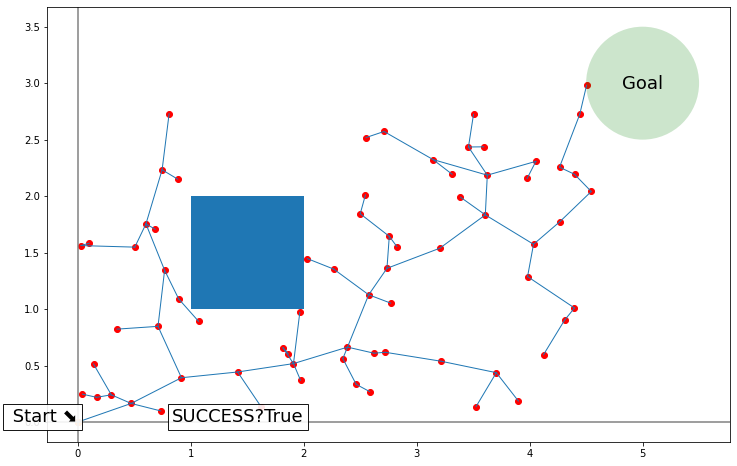

In [147]:
%matplotlib inline 
def plotRRT(succeeded, graph, winpath=None, goal_state = (5,3), goal_radius=0.5,
            obstacles=[ [[1,1], [1,2], [2,2], [2,1]] ]):
    plt.figure(figsize=(6,8))
    #plt.axes()
    goal = plt.Circle(goal_state, radius=goal_radius, fc='g', alpha=0.2)
    plt.gca().add_patch(goal)
    
    plt.gca().add_patch(plt.Rectangle((1, 1), 1,1))
    
    plt.text(goal_state[0]-0.18, goal_state[1]-0.05, 'Goal', fontsize=18)
    plt.text(0,0, ' Start ⬊', fontsize=18, bbox=dict(alpha=0.9, fc='white'), ha='right')
    plt.scatter(0,0, )
    for node in graph.nodeslist:
        #print(node)
        plt.scatter(node[0], node[1], color='red')
    for edge in graph.edgeslist:
        ptA, ptB = edge[0], edge[1]
        # x1 x2 y1 y2
        line = plt.Line2D((ptA[0], ptB[0]), (ptA[1], ptB[1]), lw=1)
        plt.gca().add_line(line)
    plt.text(2,0, 'SUCCESS?' + str(succeeded), fontsize=18, bbox=dict(alpha=0.9, fc='white'), ha='right')
    plt.scatter(0,0, )
    if winpath:
        for e in winpath:
            print('e',e)
            '''
            ptA, ptB = e[0], e[1]
            line = plt.Line2D((ptA[0], ptB[0]), (ptA[1], ptB[1]), c='lightgreen', lw=4)
            plt.gca().add_line(line)
            '''
            
    plt.axhline(0,color='gray') # x = 0
    plt.axvline(0,color='gray') # y = 0
    plt.axis('scaled')
    plt.subplots_adjust(left=-1)
    plt.show()
    
    
    
#my_fig = plotRRT(True, rrt_graph)
print(winpath)
my_fig = plotRRT(success, rrt_graph, winpath)


In [148]:
import skgeom as sg

In [103]:
foo = sg.Point2(5, 3)

5


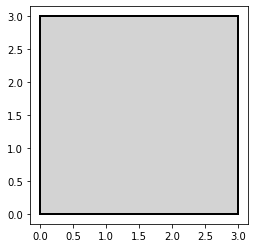

In [104]:
print(foo.x())
obstacle = sg.Polygon([[0, 0], [0, 3], [3, 3], [3,0]])
#obstacle = sg.Bbox2(0,0, 5,2)
obstacle

In [105]:
obstacle.oriented_side(sg.Point2(1.5, 3)) # positive = outside, negative = inside, 0 = on edge
sign = obstacle.oriented_side(sg.Point2(1.5, 3)) # positive = outside, negative = inside, 0 = on edge
sign <= 1

TypeError: '<=' not supported between instances of 'skgeom._skgeom.Sign' and 'int'

Segment_2(PointC2(0, 0), PointC2(0, 3))
<class 'NoneType'>
False
Segment_2(PointC2(0, 3), PointC2(3, 3))
<class 'NoneType'>
False
Segment_2(PointC2(3, 3), PointC2(3, 0))
<class 'skgeom._skgeom.Point2'>
True
Segment_2(PointC2(3, 0), PointC2(0, 0))
<class 'skgeom._skgeom.Point2'>
True


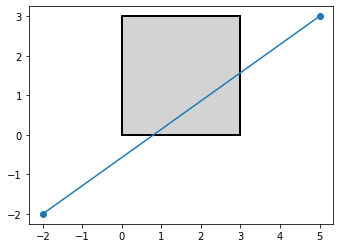

In [106]:
from skgeom.draw import draw
draw(obstacle)
b = sg.Segment2(sg.Point2(5, 3), sg.Point2(-2, -2))
draw(b)
for e in obstacle.edges:
    print(e)
    print(type(sg.intersection(b,e)))
    test = type(sg.intersection(b,e))
    print(test == sg.Point2)

In [ ]:

#i = sg.intersection(obstacle, b)
obstacle.oriented_side(b) # positive = outside, negative = inside, 0 = on edge

In [ ]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt
import numpy as np

plt.plot([0, 1, 2, 2])
plt.plot([1, 1, 2, 2])
plt.show()


In [ ]:


ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


In [ ]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
n = Node(1,2)
print(n)
print(n.x)

In [ ]:

class FancyNode(Node):
    def __init__(location, ID, parentNode):
        super().__init__(location)
        self.ID = ID
        self.parentNode = parentNode
    

In [ ]:
#edge: startID, endID? or just define by the two x,y coordinates

class Graph:
    def __init__(self):
        self.startstate = (0,0)
        self.goalstate = (0,0)
        
        self.nodeslist = []
        self.edgeslist = []
    
class RRTstar:
    def __init__(self):
        self.graph = Graph()
        self.iterations = 0
        self.limit_iters = 1000
    
    def sampleFree:
        pass
    
    def chain(oldPt, newPt, connectRadius)
        dist = calcDist(oldPt, newPt)
        if dist > connectRadius:
            # if newPt is too far from NN, truncate to be closer
            newPt = oldPt + self.connectRadius
        return newPt
    
    def isColliding:
        pass
    
    def nearest(point, nodeslist):
        return nearestNode
    
    def inGoalRegion(pt, pt_goal):
        return False
    
    def pathCost(solpath):
        return 0
    
    def calc_distance(fromPt, toPt):
        return 0
    
    def run_rrt():
        while iterations < limit_iters:
            newPt = random()
            if isColliding(newPt):
                continue
            nearestPt = nearest(self.graph, newPt)
            link = chain(newPt, nearestPt)
            self.graph.append(link)
            if inGoalRegion(newPt):
                return 'success', self.graph
        return 'failure', self.graph
            
            
        

In [98]:
#edge: startID, endID? or just define by the two x,y coordinates

class Graph:
    def __init__(self):
        self.startstate = (0,0)
        self.goalstate = (0,0)
        
        self.nodeslist = []
        self.edgeslist = []
    
class RRTstar:
    def __init__(self):
        self.graph = Graph()
        self.iterations = 0
        self.limit_iters = 1000
    
    def sampleFree:
        pass
    
    def chain(oldPt, newPt, connectRadius)
        dist = calcDist(oldPt, newPt)
        if dist > connectRadius:
            # if newPt is too far from NN, truncate to be closer
            newPt = oldPt + self.connectRadius
        return newPt
    
    def isColliding:
        pass
    
    def nearest(point, nodeslist):
        return nearestNode
    
    def inGoalRegion(pt, pt_goal):
        return False
    
    def pathCost(solpath):
        return 0
    
    def calc_distance(fromPt, toPt):
        return 0
    
    def run_rrt():
        while iterations < limit_iters:
            newPt = random()
            if isColliding(newPt):
                continue
            nearestPt = nearest(self.graph, newPt)
            link = chain(newPt, nearestPt)
            self.graph.append(link)
            if inGoalRegion(newPt):
                return 'success', self.graph
        return 'failure', self.graph
            
            
        

SyntaxError: invalid syntax (<ipython-input-98-54ddb0e23d1f>, line 17)

In [117]:
# https://doc.cgal.org/latest/Kernel_23/classCGAL_1_1Circle__2.html
# https://doc.cgal.org/latest/Kernel_23/classCGAL_1_1Circle__2.html#a54b545c955b2c19dd0cacd0aaa59a46b
# It is initialized to the circle with center center, squared radius squared_radius and orientation ori. 
a = sg.Point2(4, 5)
b = sg.Point2(2, 1)
c = sg.Point2(3, 6)
circle = sg.Circle2(a,b,c)
b = sg.Segment2(sg.Point2(5, 3), sg.Point2(-2, -2))
sign = sg.Sign(-1)
circle = sg.Circle2(a,5,sign)
sg.intersection(circle, b)

TypeError: intersection(): incompatible function arguments. The following argument types are supported:
    1. (arg0: skgeom._skgeom.Line2, arg1: skgeom._skgeom.Line2) -> object
    2. (arg0: skgeom._skgeom.Line2, arg1: skgeom._skgeom.Segment2) -> object
    3. (arg0: skgeom._skgeom.Segment2, arg1: skgeom._skgeom.Segment2) -> object
    4. (arg0: skgeom._skgeom.Ray2, arg1: skgeom._skgeom.Segment2) -> object
    5. (arg0: skgeom._skgeom.Line3, arg1: skgeom._skgeom.Line3) -> object
    6. (arg0: skgeom._skgeom.Line3, arg1: skgeom._skgeom.Plane3) -> object
    7. (arg0: skgeom._skgeom.Line3, arg1: skgeom._skgeom.Ray3) -> object
    8. (arg0: skgeom._skgeom.Line3, arg1: skgeom._skgeom.Segment3) -> object
    9. (arg0: skgeom._skgeom.Line3, arg1: skgeom._skgeom.Triangle3) -> object
    10. (arg0: skgeom._skgeom.Plane3, arg1: skgeom._skgeom.Plane3) -> object
    11. (arg0: skgeom._skgeom.Plane3, arg1: skgeom._skgeom.Ray3) -> object
    12. (arg0: skgeom._skgeom.Plane3, arg1: skgeom._skgeom.Segment3) -> object
    13. (arg0: skgeom._skgeom.Plane3, arg1: CGAL::Sphere_3<CGAL::Epeck>) -> object
    14. (arg0: skgeom._skgeom.Plane3, arg1: skgeom._skgeom.Triangle3) -> object
    15. (arg0: skgeom._skgeom.Ray3, arg1: skgeom._skgeom.Ray3) -> object
    16. (arg0: skgeom._skgeom.Ray3, arg1: skgeom._skgeom.Segment3) -> object
    17. (arg0: skgeom._skgeom.Ray3, arg1: skgeom._skgeom.Triangle3) -> object
    18. (arg0: skgeom._skgeom.Segment3, arg1: skgeom._skgeom.Segment3) -> object
    19. (arg0: skgeom._skgeom.Segment3, arg1: skgeom._skgeom.Triangle3) -> object
    20. (arg0: CGAL::Sphere_3<CGAL::Epeck>, arg1: CGAL::Sphere_3<CGAL::Epeck>) -> object
    21. (arg0: skgeom._skgeom.Triangle3, arg1: skgeom._skgeom.Triangle3) -> object

Invoked with: Circle_2(PointC2(4, 5), 5, clockwise), Segment_2(PointC2(5, 3), PointC2(-2, -2))

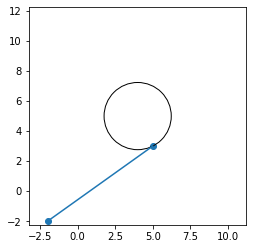

In [116]:
draw(circle)
draw(b)